In [2]:
from pomegranate import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
seq2plt = pd.read_csv('steps_example.csv')
seq2plt.head()
seq2plt.shape[0]

98

<AxesSubplot:label='0a27be6b-bea6-4377-8413-fe6d86ca40bb'>

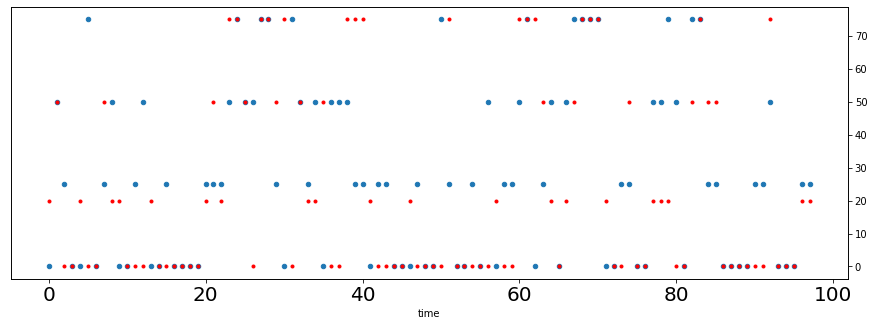

In [7]:

ax =  seq2plt.plot(x = 'time', y='steps',kind='scatter',
                    figsize=[15,5],fontsize=20,yticks = [0,50,100,150])
seq2plt['distance'].plot(secondary_y=True, style='.', color='r')

In [17]:
''' ### Set Emission Probabilities ### '''
hmm = HiddenMarkovModel()

still_steps_probs = DiscreteDistribution({'0': 0.50, '50': 0.30, '100': 0.15, '150': 0.05})
walk_steps_probs = DiscreteDistribution({'0': 0.10, '50': 0.20, '100': 0.50, '150': 0.20})

still_dist_probs = DiscreteDistribution({'0': 0.55, '20': 0.25, '50': 0.18, '75': 0.02})
walk_dist_probs = DiscreteDistribution({'0': 0.05, '20': 0.35, '50': 0.55, '75': 0.10})

# still_steps_probs = NormalDistribution(5, 15)
# walk_steps_probs = NormalDistribution(100, 15)

# still_dist_probs = NormalDistribution(5,30)
# walk_dist_probs = NormalDistribution(50,30)

still_probs = IndependentComponentsDistribution([still_steps_probs,still_dist_probs])
walk_probs = IndependentComponentsDistribution([walk_steps_probs,walk_dist_probs])

walk  = State(walk_probs , name='walk' )
still = State(still_probs, name='still')

hmm.add_states(walk, still)

''' ### Set Transition probabilities ### '''
hmm.add_transition( hmm.start, walk, 0.5 )
hmm.add_transition( hmm.start, still, 0.5 )
hmm.add_transition( walk, walk, 0.8 )
hmm.add_transition( walk, still, 0.2 )
hmm.add_transition( still, walk, 0.05 )
hmm.add_transition( still, still, 0.95 )


''' ### Bake model ### '''
hmm.bake()

In [14]:
''' ### Seq ### '''
seq2 = seq2plt[['steps', 'distance']].to_numpy()
seq2 = seq2.astype(str)

In [15]:
''' ### Make Predictions ### '''

#seq2 = [['0', '20'],['0','50'],['50','20']]
hmm_predictions = hmm.predict( seq2 )

Text(0, 0.5, 'probability')

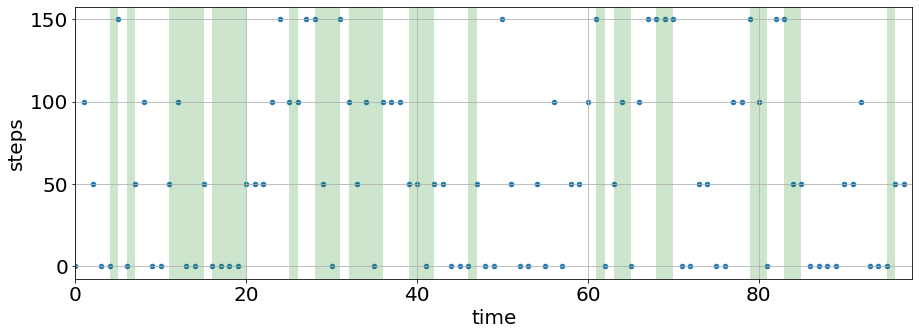

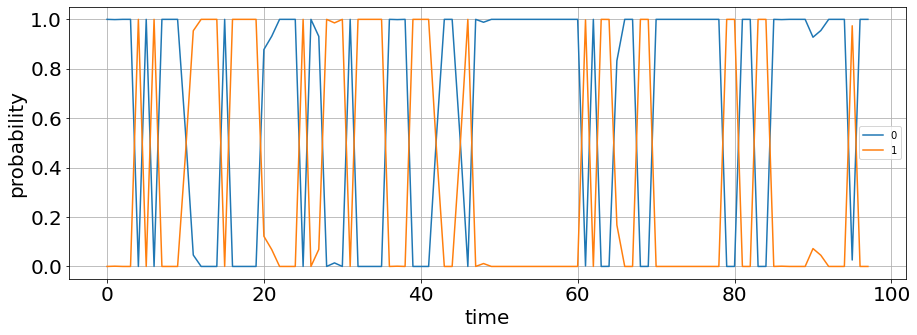

In [16]:
''' ### Plot results ### '''
hp_plt = pd.DataFrame(hmm_predictions).astype('int').reset_index()
hp_plt.columns = ['time','prediction']
ax =  seq2plt.plot(x = 'time', y='steps',kind='scatter',
                    figsize=[15,5],fontsize=20,yticks = [0,50,100,150])

walk_times = hp_plt[hp_plt.prediction==1].index
for i in walk_times:
    ax.axvspan(i,i+1, facecolor='green', edgecolor='none', alpha=.2)
plt.grid()
plt.xlim([0,len(seq2)])
plt.xlabel('time',fontsize=20)
plt.ylabel('steps',fontsize=20)

''' ### Probabiliteis for each observation ### '''
pd.DataFrame(hmm.predict_proba( seq2 )).plot(figsize=[15,5],fontsize=20)
plt.grid()
plt.xlabel('time',fontsize=20)
plt.ylabel('probability',fontsize=20)
